# read Fmcc from .json

In [60]:
import json
import codecs
import numpy as np


In [61]:
def ImportMfccData(pathMfccSave):
    objDataRead = codecs.open(pathMfccSave, 'r', encoding='utf-8').read()
    Rdata = json.loads(objDataRead)
    
    RX = np.array(Rdata['X'])
    RY = np.array(Rdata['Y'])
    Rmapping = Rdata['mapping']
    return RX,RY,Rmapping

In [62]:
pathMfccSave ='fmcc_marine_mamal.json'
RX,RY,Rmapping = ImportMfccData(pathMfccSave)
print('data importing completed')

data importing completed


In [63]:
np.unique(RY, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([  16,  213,   57,    3,  264,   71,  201, 1622,   72]))

# prepare data

In [64]:
##### prepare data

from sklearn.model_selection import train_test_split
test_size = 0.25
validation_size = 0.2
def prepareData (X, Y, test_size, validation_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
        
    X_train = X_train[..., np.newaxis] 
    X_validation = X_validation[..., np.newaxis] 
    X_test = X_test[..., np.newaxis] 

    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [65]:

X_train, X_validation, X_test,y_train, y_validation, y_test = prepareData (RX, RY, test_size, validation_size)

In [66]:
## debugging
X_train.shape

(1511, 40, 100, 1)

# Training model

In [67]:

import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [68]:

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    # Save image
    fig.subplots_adjust(hspace=0.5)
    plt.savefig('/Users/javonnii/dolby_io/acc_loss_metrics.png', bbox_inches='tight')
    plt.show()
print('end')

end


In [69]:
def build_model(input_shape):
    
    # Instantiate model
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization()) # normalizes the activation at the layer, speeds up training
              
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
                  
              
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
              
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten()) # flatten conv output
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) # randomly drops neurons
            
    # output layer that uses softmax
    model.add(keras.layers.Dense(9, activation='softmax')) # number of neurons of the classifications we want to predict
    
    print(model.summary())
    
    return model
print('end')

end


In [70]:
def build_model(input_shape):
    
    # Instantiate model
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization()) # normalizes the activation at the layer, speeds up training
              
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
                  
              
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2,2), padding='same'))
    model.add(keras.layers.BatchNormalization())
              
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten()) # flatten conv output
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3)) # randomly drops neurons
            
    # output layer that uses softmax
    model.add(keras.layers.Dense(9, activation='softmax')) # number of neurons of the classifications we want to predict
    
    print(model.summary())
    
    return model
print('end')

end


In [71]:
# build the cnn net
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_model(input_shape)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 38, 98, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 19, 49, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 19, 49, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 24, 32)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 9, 24, 32)         128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 23, 32)        

In [72]:
# compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [73]:
# Train the cnn 
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=40)


Epoch 1/40
48/48 [==============================] - 15s 251ms/step - loss: 1.2782 - accuracy: 0.6110 - val_loss: 1.6624 - val_accuracy: 0.4683
Epoch 2/40
48/48 [==============================] - 12s 251ms/step - loss: 0.4984 - accuracy: 0.8275 - val_loss: 0.8470 - val_accuracy: 0.8307
Epoch 3/40
48/48 [==============================] - 11s 226ms/step - loss: 0.3475 - accuracy: 0.8780 - val_loss: 0.4588 - val_accuracy: 0.8757
Epoch 4/40
48/48 [==============================] - 11s 238ms/step - loss: 0.2928 - accuracy: 0.8914 - val_loss: 0.3108 - val_accuracy: 0.8757
Epoch 5/40
48/48 [==============================] - 11s 238ms/step - loss: 0.2442 - accuracy: 0.9069 - val_loss: 0.2419 - val_accuracy: 0.8968
Epoch 6/40
48/48 [==============================] - 12s 252ms/step - loss: 0.2356 - accuracy: 0.9059 - val_loss: 0.2049 - val_accuracy: 0.9153
Epoch 7/40
48/48 [==============================] - 12s 249ms/step - loss: 0.1847 - accuracy: 0.9218 - val_loss: 0.1712 - val_accuracy: 0.9127

In [74]:
# plot accuracy/error for training and validation
# plot_history(history)

In [75]:
# evaluate the cnn on the test set

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

20/20 [==============================] - 1s 49ms/step - loss: 0.1368 - accuracy: 0.9206
Accuracy on test set is: 0.920634925365448


# confution metrix

In [76]:
# iterate each sample of X_test, predict, and store predicted index into a numpy array.

ypred_array = np.array([])

for i in range(len(X_test)):
    X = X_test[i]
    X = X[np.newaxis, ...] # to make a 4D
    
    # prediction
    prediction = model.predict(X)
    
    # extract the index with the max value
    predicted_index = np.argmax(prediction, axis=1)
    ypred_array = np.append(ypred_array, predicted_index)

print(ypred_array)

[7. 1. 5. 7. 7. 7. 7. 7. 7. 6. 7. 7. 2. 6. 4. 4. 7. 4. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 2. 7. 7. 7. 4. 4. 7. 7. 7. 7. 7. 0. 7. 6. 7. 7. 1. 7. 6. 4. 7.
 7. 4. 7. 7. 7. 7. 1. 1. 7. 7. 6. 7. 7. 7. 7. 7. 7. 7. 7. 5. 1. 7. 6. 7.
 7. 7. 4. 7. 7. 7. 7. 7. 1. 4. 7. 4. 8. 7. 7. 7. 4. 7. 6. 4. 4. 5. 7. 4.
 7. 7. 7. 7. 7. 7. 5. 7. 7. 7. 4. 7. 7. 5. 7. 7. 6. 5. 1. 7. 4. 7. 0. 4.
 6. 7. 7. 7. 7. 7. 6. 1. 7. 4. 4. 7. 7. 7. 4. 6. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 4. 6. 7. 4. 5. 7. 7. 7. 1. 7. 5. 7. 7. 7. 7. 1. 6. 7. 7.
 6. 7. 7. 8. 7. 7. 7. 5. 5. 7. 6. 7. 7. 7. 4. 7. 7. 4. 7. 7. 6. 1. 7. 7.
 7. 7. 7. 7. 7. 4. 7. 7. 7. 6. 7. 7. 7. 6. 7. 4. 7. 7. 2. 7. 7. 1. 7. 7.
 7. 7. 1. 7. 7. 7. 7. 4. 7. 7. 7. 6. 7. 7. 7. 6. 2. 7. 7. 4. 4. 1. 8. 7.
 7. 7. 1. 7. 7. 4. 7. 7. 7. 1. 7. 6. 7. 8. 7. 4. 7. 6. 7. 7. 4. 4. 7. 7.
 7. 7. 5. 7. 7. 7. 7. 4. 5. 7. 5. 7. 1. 7. 7. 7. 7. 7. 4. 7. 7. 2. 8. 4.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 4. 7. 4. 6. 7. 7. 4. 7. 8. 7. 7. 7. 7. 7. 4.
 7. 7. 1. 2. 7. 7. 7. 7. 7. 7. 4. 7. 7. 6. 7. 2. 7.

In [77]:
confusion_mtx

<tf.Tensor: shape=(9, 9), dtype=int32, numpy=
array([[ 10,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,  34,   0,   0,  39,   1,   0,   1,   0],
       [  0,   2,  26,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   0,   0,   3,   0,   0],
       [  0,  32,   0,   0,  84,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  27,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  85,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0, 622,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  25]], dtype=int32)>

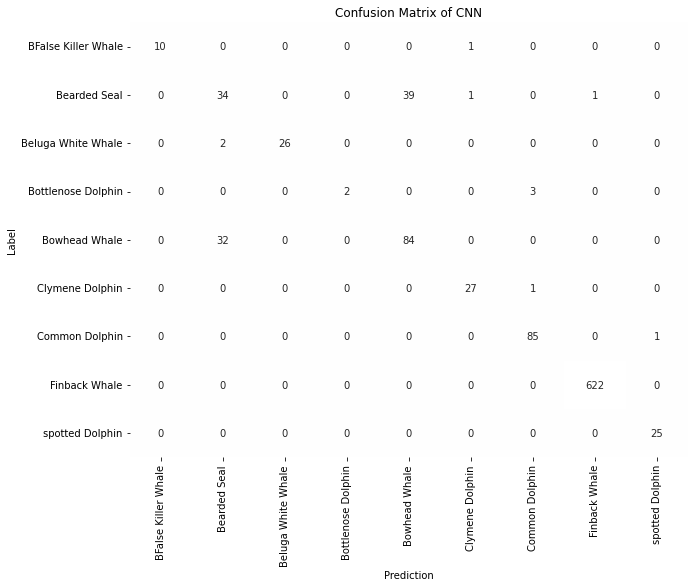

In [58]:
import seaborn as sns
confusion_mtx = tf.math.confusion_matrix(y_test, ypred_array) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=Rmapping.keys(), yticklabels=Rmapping.keys(),
             annot=True, fmt='g', cbar=False, cmap= 'gray', vmin = -100000, vmax =600)
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.title("Confusion Matrix of CNN")
plt.show();


# Predict Sample

In [59]:
def predict(model, X, y):
    X = X[np.newaxis, ...] # to put make a 4D
    
    # prediction = [ [0.1, 0.2, ...] ] result of the softmax
    prediction = model.predict(X) # X -> (130, 13, 1) but expect 4D i.e num samples (1, 130, 13, 1)
    
    # extract the index with the max value
    predicted_index = np.argmax(prediction, axis=1) # [idx] 
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))
#     print(X.shape)
    

In [ ]:
# make a prediction on a sample
X = X_test[65]
y = y_test[65]

predict(model, X, y)